# Paso 1: Preparación de datos

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel("/content/Base final casos 1 y 3.xlsx")
df.head(10)

,id_cliente,edad,sexo,parroquia,n_visitas,gasto_total,ultima_visita,recencia,retorno,inmunologicas,generales,citologia,especiales,medicina_ocup
0,1726896010,26,Masculino,El Chaupi,1,160.0,2024-07-23,8,No,No,Si,No,Si,No
1,0551205495,3,Masculino,El Chaupi,1,160.0,2024-07-23,8,No,No,Si,No,Si,No
2,1717307605,41,Masculino,Guamani,1,150.0,2023-04-06,482,No,No,Si,No,Si,No
3,1723171201,30,Masculino,Machachi,1,150.0,2024-04-16,106,No,No,Si,No,Si,No
4,1758251969,7,Masculino,Tambillo,1,150.0,2023-04-06,482,No,No,Si,No,Si,No
5,0606305456,23,Masculino,Machachi,1,150.0,2023-03-16,503,No,No,Si,No,Si,No
6,CCAM,6,Femenino,Machachi,1,150.0,2024-04-16,106,No,No,Si,No,Si,No
7,CLDA,2,Masculino,Amaguaña,1,150.0,2023-03-16,503,No,No,Si,No,Si,No
8,1709591794,57,Femenino,Aloasi,11,150.0,2024-06-03,58,Si,No,Si,No,No,No
9,1761304995,2,Masculino,Machachi,3,131.0,2024-03-25,128,Si,No,Si,No,No,No


# Paso 2: Preprocesamiento de los Datos

In [ ]:
# 1. Lidiar con valores nulos en 'parroquia'
df['parroquia'] = df['parroquia'].fillna("Desconocido")

# 2. Convertir `sexo`, `parroquia`, y `retorno` a tipo 'category'
df['sexo'] = df['sexo'].astype('category')
df['parroquia'] = df['parroquia'].astype('category')
df['retorno'] = df['retorno'].astype('category')
df['inmunologicas'] = df['inmunologicas'].astype('category')
df['generales'] = df['generales'].astype('category')
df['citologia'] = df['citologia'].astype('category')
df['especiales'] = df['especiales'].astype('category')
df['medicina_ocup'] = df['medicina_ocup'].astype('category')


In [ ]:
df = df.drop(columns=['id_cliente', 'ultima_visita'])

In [ ]:
numeric_columns = ['edad', 'n_visitas', 'gasto_total', 'recencia']
categorical_columns = ['sexo', 'parroquia', 'retorno','inmunologicas', 'generales', 'citologia', 'especiales','medicina_ocup']
# Confirmamos los tipos de datos
print("\nTipos de datos actualizados:")
print(df.dtypes)


Tipos de datos actualizados:
edad                int64
sexo             category
parroquia        category
n_visitas           int64
gasto_total       float64
recencia            int64
retorno          category
inmunologicas    category
generales        category
citologia        category
especiales       category
medicina_ocup    category
dtype: object


# Paso 3: Implementación del Modelo K-Prototypes

In [ ]:
!pip install kmodes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 1202691.618014047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 1202691.618014047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 1202691.618014047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 1202691.618014047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 1202691.618014047
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 1202691.618014047
Init: initializing centroids
Init: initializing clusters
Starting iterations..

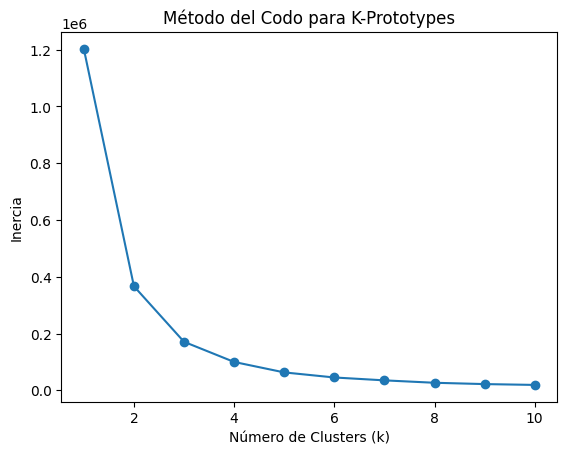

In [ ]:
df_selected = df[['edad', 'inmunologicas', 'generales', 'citologia', 'especiales', 'medicina_ocup']].copy()

df_kprototypes = df_selected.copy()

# Convertir las columnas categóricas a valores numéricos (por ejemplo, usando codificación one-hot)
df_kprototypes = pd.get_dummies(df_kprototypes, columns=['inmunologicas', 'generales', 'citologia', 'especiales', 'medicina_ocup'])

# Convertir el DataFrame a una matriz numpy
data = df_kprototypes.to_numpy()

# Lista para almacenar la inercia para diferentes valores de k
inertias = []

# Iterar a través de un rango de valores de k
for k in range(1, 11):  # Probar valores de k de 1 a 10
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2)
    kproto.fit_predict(data, categorical=[1])  # Ajustar el modelo
    inertias.append(kproto.cost_)

# Graficar la inercia en función de k (método del codo)
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

In [ ]:

# Define el número de clusters (K) (según el método del codo)
k = 3

# Crea el modelo K-Prototypes
kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2)

# Ajusta el modelo a los datos y predice los clusters
clusters = kproto.fit_predict(data, categorical=[1])  # 'inmunologicas' es categórica

# Agrega la columna de cluster al DataFrame
df_kprototypes['cluster'] = clusters

# Muestra los resultados
print(df_kprototypes.head())

# Media de 'edad' para cada cluster:
print(df_kprototypes.groupby('cluster')['edad'].mean())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 564, ncost: 179169.07955581503
Run: 1, iteration: 2/100, moves: 131, ncost: 173680.46448321771
Run: 1, iteration: 3/100, moves: 81, ncost: 171665.04954786453
Run: 1, iteration: 4/100, moves: 41, ncost: 171112.50986642542
Run: 1, iteration: 5/100, moves: 0, ncost: 171112.50986642542
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 426, ncost: 188891.35028665676
Run: 2, iteration: 2/100, moves: 182, ncost: 178106.23328130078
Run: 2, iteration: 3/100, moves: 113, ncost: 174186.60104996432
Run: 2, iteration: 4/100, moves: 76, ncost: 172364.45829616563
Run: 2, iteration: 5/100, moves: 10, ncost: 172297.778682624
Run: 2, iteration: 6/100, moves: 0, ncost: 172297.778682624
Init: initializing centroids
Init: initializing clusters
Starting iterat

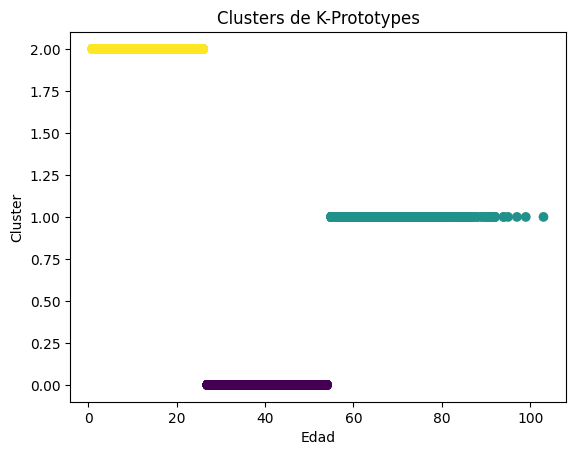

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión para visualizar los clusters
plt.scatter(df_kprototypes['edad'], df_kprototypes['cluster'], c=df_kprototypes['cluster'], cmap='viridis')
plt.title('Clusters de K-Prototypes')
plt.xlabel('Edad')
plt.ylabel('Cluster')
plt.show()


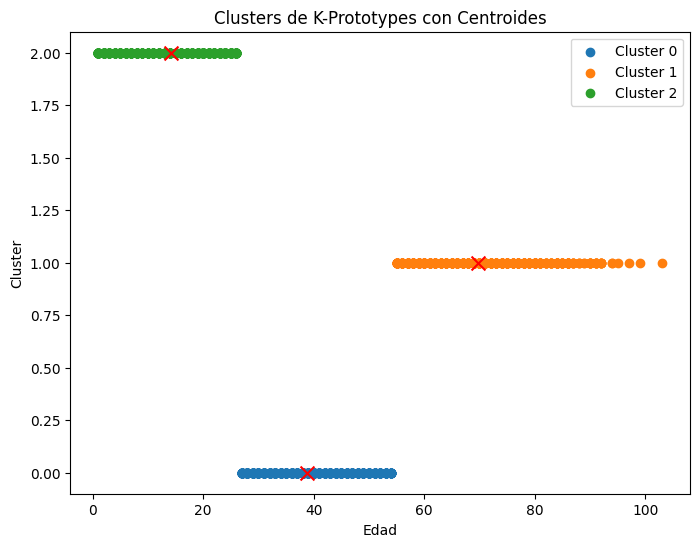

In [ ]:
# Graficar los centroides para cada cluster
plt.figure(figsize=(8, 6))

for cluster in range(k):
    cluster_data = df_kprototypes[df_kprototypes['cluster'] == cluster]
    plt.scatter(cluster_data['edad'], cluster_data['cluster'], label=f'Cluster {cluster}')

    # Calcular y mostrar el centroide para este cluster
    centroid_x = cluster_data['edad'].mean()
    centroid_y = cluster
    plt.scatter(centroid_x, centroid_y, marker='x', color='red', s=100)

plt.title('Clusters de K-Prototypes con Centroides')
plt.xlabel('Edad')
plt.ylabel('Cluster')
plt.legend()
plt.show()

In [ ]:
# Características más representativas de cada cluster
for cluster in range(k):
  cluster_data = df_kprototypes[df_kprototypes['cluster'] == cluster]
  print(f"\nCaracterísticas del Cluster {cluster}:")
  print("------------------------------------")

  # Media de 'edad' para el cluster
  print(f"Edad promedio: {cluster_data['edad'].mean():.2f}")

  # Análisis de las variables categóricas
  for column in ['inmunologicas', 'generales', 'citologia', 'especiales', 'medicina_ocup']:
    if column in df_kprototypes.columns:
      print(f"\nFrecuencia de valores en '{column}':")
      print(cluster_data[column].value_counts(normalize=True))



Características del Cluster 0:
------------------------------------
Edad promedio: 38.86

Características del Cluster 1:
------------------------------------
Edad promedio: 69.64

Características del Cluster 2:
------------------------------------
Edad promedio: 14.23


In [ ]:
print(df_kprototypes['cluster'].value_counts())


cluster
0    925
2    804
1    576
Name: count, dtype: int64


In [ ]:
print(df_kprototypes.columns)


Index(['edad', 'inmunologicas_No', 'inmunologicas_Si', 'generales_No',
       'generales_Si', 'citologia_No', 'citologia_Si', 'especiales_No',
       'especiales_Si', 'medicina_ocup_No', 'medicina_ocup_Si', 'cluster'],
      dtype='object')


In [ ]:
# Características más representativas de cada cluster
for cluster in range(k):
    cluster_data = df_kprototypes[df_kprototypes['cluster'] == cluster]
    print(f"\nCaracterísticas del Cluster {cluster}:")
    print("------------------------------------")

    # Análisis de las variables categóricas
    for column in ['inmunologicas', 'generales', 'citologia', 'especiales', 'medicina_ocup']:
        # Verificar si las columnas de 'Sí' y 'No' existen en df_kprototypes
        if f'{column}_No' in df_kprototypes.columns and f'{column}_Si' in df_kprototypes.columns:
            print(f"\nFrecuencia de valores en '{column}':")
            print(f"Sí: {cluster_data[f'{column}_Si'].sum() / len(cluster_data) * 100:.2f}%")
            print(f"No: {cluster_data[f'{column}_No'].sum() / len(cluster_data) * 100:.2f}%")
        else:
            print(f"\nLa columna '{column}' no se encuentra en df_kprototypes.")



Características del Cluster 0:
------------------------------------

Frecuencia de valores en 'inmunologicas':
Sí: 19.89%
No: 80.11%

Frecuencia de valores en 'generales':
Sí: 99.78%
No: 0.22%

Frecuencia de valores en 'citologia':
Sí: 14.49%
No: 85.51%

Frecuencia de valores en 'especiales':
Sí: 35.89%
No: 64.11%

Frecuencia de valores en 'medicina_ocup':
Sí: 1.84%
No: 98.16%

Características del Cluster 1:
------------------------------------

Frecuencia de valores en 'inmunologicas':
Sí: 15.28%
No: 84.72%

Frecuencia de valores en 'generales':
Sí: 99.31%
No: 0.69%

Frecuencia de valores en 'citologia':
Sí: 10.07%
No: 89.93%

Frecuencia de valores en 'especiales':
Sí: 27.78%
No: 72.22%

Frecuencia de valores en 'medicina_ocup':
Sí: 3.65%
No: 96.35%

Características del Cluster 2:
------------------------------------

Frecuencia de valores en 'inmunologicas':
Sí: 17.04%
No: 82.96%

Frecuencia de valores en 'generales':
Sí: 100.00%
No: 0.00%

Frecuencia de valores en 'citologia':
Sí: 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 1202722.6203330315
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 1202722.6203330315
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 1202722.6203330315
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 1202722.6203330315
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 1202722.6203330315
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 1202722.6203330315
Init: initializing centroids
Init: initializing clusters
Starting iterat

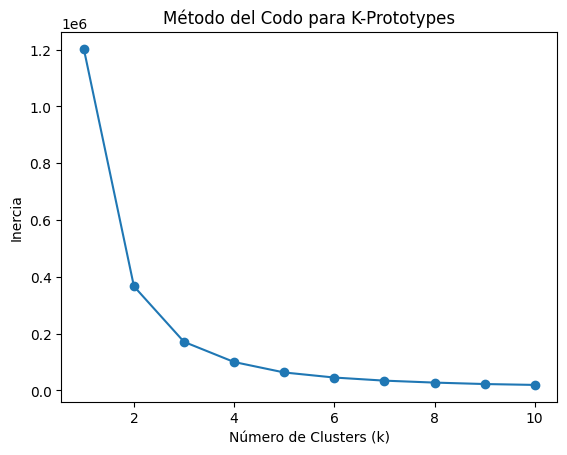

In [ ]:
df_selected = df[['edad', 'parroquia', 'sexo']].copy()

df_kprototypes = df_selected.copy()

# Convertir las columnas categóricas a valores numéricos (por ejemplo, usando codificación one-hot)
df_kprototypes = pd.get_dummies(df_kprototypes, columns=['parroquia', 'sexo'])

# Convertir el DataFrame a una matriz numpy
data = df_kprototypes.to_numpy()

# Lista para almacenar la inercia para diferentes valores de k
inertias = []

# Iterar a través de un rango de valores de k
for k in range(1, 11):  # Probar valores de k de 1 a 10
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2)
    kproto.fit_predict(data, categorical=[1])  # Ajustar el modelo
    inertias.append(kproto.cost_)

# Graficar la inercia en función de k (método del codo)
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método del Codo para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

In [ ]:
# Define el número de clusters (K) (según el método del codo)
k = 3

# Crea el modelo K-Prototypes
kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2)

# Ajusta el modelo a los datos y predice los clusters
clusters = kproto.fit_predict(data, categorical=[1])

# Agrega la columna de cluster al DataFrame
df_kprototypes['cluster'] = clusters

# Muestra los resultados
print(df_kprototypes.head())

# Media de 'edad' para cada cluster:
print(df_kprototypes.groupby('cluster')['edad'].mean())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 461, ncost: 243347.02300184662
Run: 1, iteration: 2/100, moves: 331, ncost: 198412.93240457898
Run: 1, iteration: 3/100, moves: 205, ncost: 183178.72623868057
Run: 1, iteration: 4/100, moves: 134, ncost: 176729.57336497723
Run: 1, iteration: 5/100, moves: 90, ncost: 173650.29105394575
Run: 1, iteration: 6/100, moves: 62, ncost: 172397.80010595606
Run: 1, iteration: 7/100, moves: 10, ncost: 172331.11211072942
Run: 1, iteration: 8/100, moves: 0, ncost: 172331.11211072942
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 178, ncost: 179007.0496966808
Run: 2, iteration: 2/100, moves: 122, ncost: 174538.96534090943
Run: 2, iteration: 3/100, moves: 83, ncost: 172419.8829685426
Run: 2, iteration: 4/100, moves: 14, ncost: 172331.11211072942
Run: 

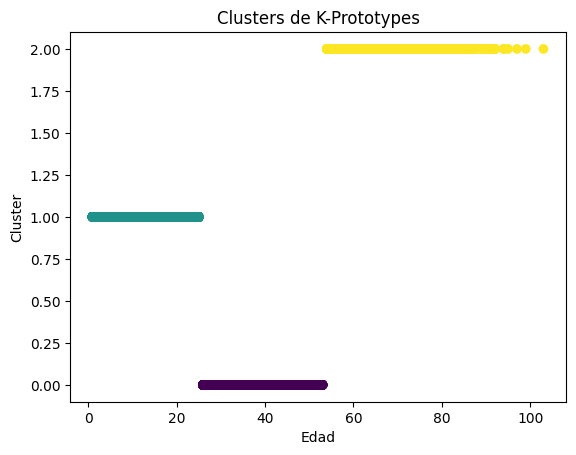

In [ ]:
# Gráfico de dispersión para visualizar los clusters
plt.scatter(df_kprototypes['edad'], df_kprototypes['cluster'], c=df_kprototypes['cluster'], cmap='viridis')
plt.title('Clusters de K-Prototypes')
plt.xlabel('Edad')
plt.ylabel('Cluster')
plt.show()

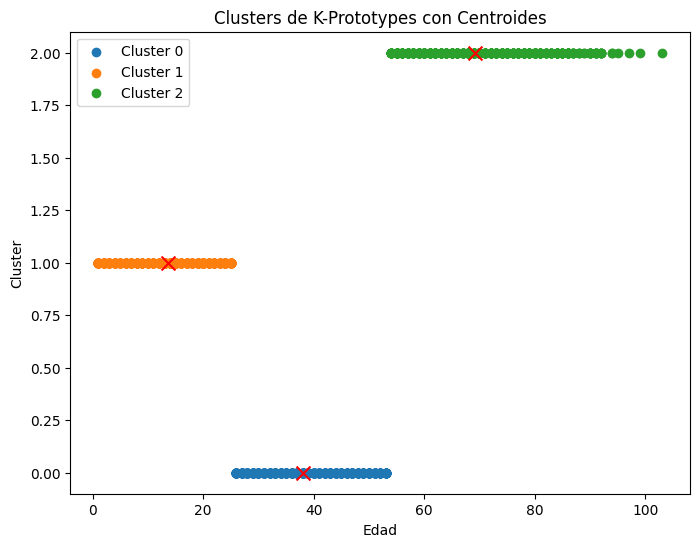

In [ ]:
# Graficar los centroides para cada cluster
plt.figure(figsize=(8, 6))

for cluster in range(k):
    cluster_data = df_kprototypes[df_kprototypes['cluster'] == cluster]
    plt.scatter(cluster_data['edad'], cluster_data['cluster'], label=f'Cluster {cluster}')

    # Calcular y mostrar el centroide para este cluster
    centroid_x = cluster_data['edad'].mean()
    centroid_y = cluster
    plt.scatter(centroid_x, centroid_y, marker='x', color='red', s=100)

plt.title('Clusters de K-Prototypes con Centroides')
plt.xlabel('Edad')
plt.ylabel('Cluster')
plt.legend()
plt.show()

In [ ]:
# Características más representativas de cada cluster
for cluster in range(k):
  cluster_data = df_kprototypes[df_kprototypes['cluster'] == cluster]
  print(f"\nCaracterísticas del Cluster {cluster}:")
  print("------------------------------------")

  # Media de 'edad' para el cluster
  print(f"Edad promedio: {cluster_data['edad'].mean():.2f}")

  # Análisis de las variables categóricas
  for column in ['parroquia', 'sexo']:
    if column in df_kprototypes.columns:
      print(f"\nFrecuencia de valores en '{column}':")
      print(cluster_data[column].value_counts(normalize=True))


Características del Cluster 0:
------------------------------------
Edad promedio: 38.09

Características del Cluster 1:
------------------------------------
Edad promedio: 13.62

Características del Cluster 2:
------------------------------------
Edad promedio: 69.25


In [ ]:
print(df_kprototypes.columns)

Index(['edad', 'parroquia_Aloag', 'parroquia_Aloasi', 'parroquia_Amaguaña',
       'parroquia_Cutuglahua', 'parroquia_Desconocido', 'parroquia_El Chaupi',
       'parroquia_Guamani', 'parroquia_Guaranda', 'parroquia_Latacunga',
       'parroquia_Machachi', 'parroquia_Manuel Cornejo Astorga (Tandapi)',
       'parroquia_Quito Distrito Metropolitano', 'parroquia_Sangolqui',
       'parroquia_Tambillo', 'parroquia_Uyumbicho', 'sexo_Femenino',
       'sexo_Masculino', 'cluster'],
      dtype='object')


In [ ]:
# Características más representativas de cada cluster
for cluster in range(k):
    cluster_data = df_kprototypes[df_kprototypes['cluster'] == cluster]
    print(f"\nCaracterísticas del Cluster {cluster}:")
    print("------------------------------------")

    # Media de 'edad' para el cluster
    print(f"Edad promedio: {cluster_data['edad'].mean():.2f}")

    # Análisis de las variables categóricas (parroquia y sexo)
    for column in ['parroquia', 'sexo']:
        # Iterar a través de las columnas codificadas con one-hot
        for col in [col for col in df_kprototypes.columns if col.startswith(column)]:
            if col in cluster_data.columns:
                percentage = (cluster_data[col].sum() / len(cluster_data)) * 100
                print(f"Porcentaje de '{col}': {percentage:.2f}%")


Características del Cluster 0:
------------------------------------
Edad promedio: 38.09
Porcentaje de 'parroquia_Aloag': 8.85%
Porcentaje de 'parroquia_Aloasi': 7.27%
Porcentaje de 'parroquia_Amaguaña': 0.53%
Porcentaje de 'parroquia_Cutuglahua': 1.05%
Porcentaje de 'parroquia_Desconocido': 7.59%
Porcentaje de 'parroquia_El Chaupi': 2.21%
Porcentaje de 'parroquia_Guamani': 0.74%
Porcentaje de 'parroquia_Guaranda': 0.11%
Porcentaje de 'parroquia_Latacunga': 0.53%
Porcentaje de 'parroquia_Machachi': 60.48%
Porcentaje de 'parroquia_Manuel Cornejo Astorga (Tandapi)': 0.32%
Porcentaje de 'parroquia_Quito Distrito Metropolitano': 1.26%
Porcentaje de 'parroquia_Sangolqui': 0.84%
Porcentaje de 'parroquia_Tambillo': 7.48%
Porcentaje de 'parroquia_Uyumbicho': 0.74%
Porcentaje de 'sexo_Femenino': 67.76%
Porcentaje de 'sexo_Masculino': 32.24%

Características del Cluster 1:
------------------------------------
Edad promedio: 13.62
Porcentaje de 'parroquia_Aloag': 8.76%
Porcentaje de 'parroquia_A